# Aim

To implement Ideal Low Pass & High Pass Filtering on an image

# Implementation

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/DJ/Sem 6/IPCV/cam.jpg'

Original Image


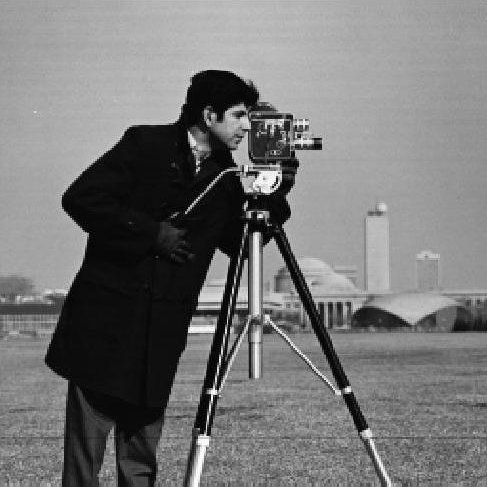

In [ ]:
img = cv.imread(path, 0)
print('Original Image')
cv2_imshow(img)

# Ideal Low Pass Filter

In [ ]:
def ILPF(img, cutoffFreq=50):
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    
    x = np.linspace(-center_col, center_col - 1, cols)
    y = np.linspace(-center_row, center_row - 1, rows)
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X**2 + Y**2)
    mask = (distance <= cutoffFreq).astype(int)
    
    dft_2d = np.fft.fft2(img)
    shifted_2d_dft = np.fft.fftshift(dft_2d)
    filtered_img = shifted_2d_dft * mask
    reformed_img = np.real(np.fft.ifft2(np.fft.ifftshift(filtered_img)))
  
    return reformed_img

In [ ]:
LPimg = ILPF(img)

Ideal Low Passed Image with D0 = 50


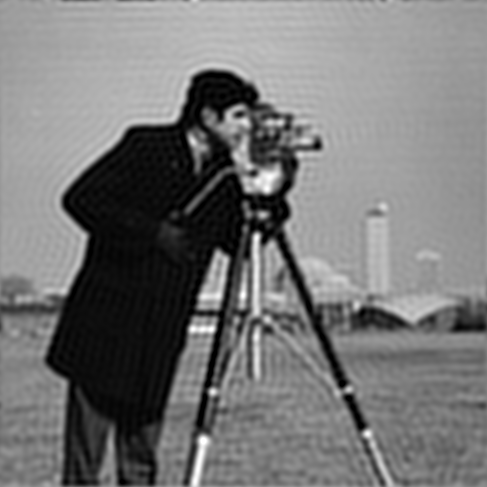

In [ ]:
print('Ideal Low Passed Image with D0 = 50')
cv2_imshow(LPimg)

# Ideal High Pass Filter

In [ ]:
def IHPF(img, cutoffFreq=20):
    rows, cols = img.shape
    centreRow, centreCol = rows // 2, cols // 2

    x = np.linspace(-centreCol, centreCol - 1, cols)
    y = np.linspace(-centreRow, centreRow - 1, rows)
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X ** 2 + Y ** 2)
    mask = distance >= cutoffFreq

    dft_2d = np.fft.fft2(img)
    shifted_2d_dft = np.fft.fftshift(dft_2d)

    filtered_dft = shifted_2d_dft * mask
    filtered_dft = np.fft.ifftshift(filtered_dft)

    result = np.real(np.fft.ifft2(filtered_dft))

    return result

In [ ]:
HPimg = IHPF(img, 20)

Ideal High Passed Image with D0 = 20


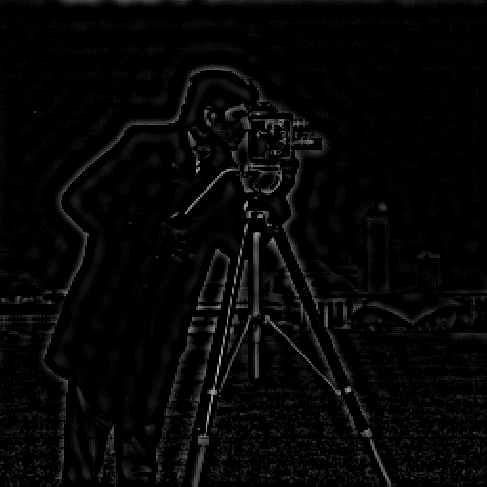

In [ ]:
print('Ideal High Passed Image with D0 = 20')
cv2_imshow(HPimg)

#Conclusion

Ideal Low Pass Filter allowed lower frequency regions through and blocked the higher frequencies

Ideal High Pass Filter allowed higher frequency regions through and blocked the lower frequency regions